# Production decline analysis
Ayush Pratap Singh
21JE0213
IIT(ISM) DHANBAD

#Production decline analysis is a traditional means of identifying well production problems and predicting well performance and life based on real production data. It uses empirical decline models that have little fundamental justifications. These models include the following:

. Exponential decline (constant fractional decline)
. Harmonic decline
. Hyperbolic decline

#Hyperbolic-Decline Model

The Most Generic model of all. The constants b and d are determined by production data.
1/q(dq/dt)= -bq^d

0<d<1 : Hyperbolic Model 
d=0 : Exponential Model 
d=1 : Harmonic Model




Example 1: Exponential Decline
Given that a well has declined from 100 stb/day to 96 stb/day during a 1-month period, use the exponential decline model to perform the following tasks:

Predict the production rate after 11 more months
Calculate the amount of oil produced during the first
year 3. Project the yearly production for the well for the next 5 years

In [8]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
t_1m = 1 #month
q_1m = 96 #stb/d

t_0m = 0 #month
q_0m = 100 #stb/d

b = np.log(q_0m/q_1m)/(t_1m - t_0m)


print(f'The Decline Rate b is {b} /month')

The Decline Rate b is 0.0408219945202552 /month


In [10]:
# Now using this per month decline, we can calculate the Flow Rate at the end of 1 yr. 

def q_calculator_exp(month):
    
    return q_0m*np.exp(-month*b)


q_12m = q_calculator_exp(12)


print(f'The flowrate at the end of 12 months is: {q_12m} STB/Day')

The flowrate at the end of 12 months is: 61.27097573297669 STB/Day


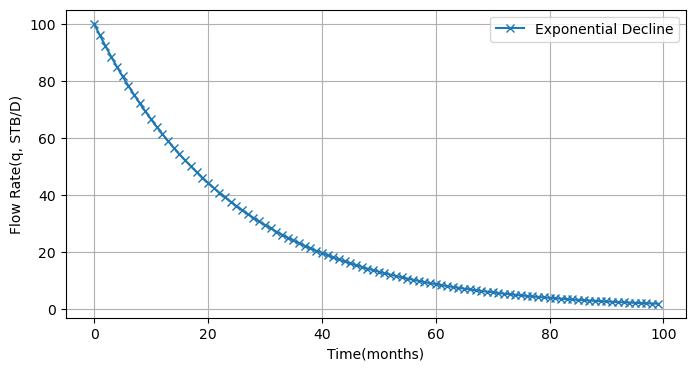

In [11]:
#Let's visualize how this flowrate v/s time looks like. 

t = np.arange(0,100,1)

q = q_calculator_exp(t)

plt.figure(figsize=(8,4))
plt.style.use('default')

plt.plot(t,q,marker='x',label='Exponential Decline')

plt.ylabel('Flow Rate(q, STB/D)')
plt.xlabel('Time(months)')
plt.legend()
plt.grid()

In [16]:
#Production rate after 11 MORE months - Means at the end of 1 Year. (1 + 11)

#At the end of 5 yrs, Total Months = 5*12

q_5yr = q_calculator_exp(60)

print(f'The flowrate at the end of 5yrs is: {q_5yr} STB/Day')

The flowrate at the end of 5yrs is: 8.635231448510442 STB/Day


Calculation of Cummulative Production.

 N_{p} = \frac { q_0 - q_0 e^{-bt} } {b}

In [17]:
def Np_exp(t):
    
    Np = (q_0m - q_0m*np.exp(-b*t))/b
    
    return Np


Np_monthwise = Np_exp(t)

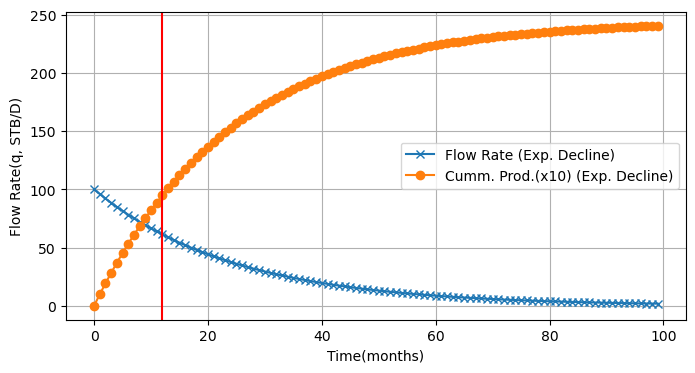

In [18]:
plt.figure(figsize=(8,4))
plt.style.use('default')

plt.plot(t,q,marker='x',label='Flow Rate (Exp. Decline)')
plt.plot(t,Np_monthwise/10,marker='o',label='Cumm. Prod.(x10) (Exp. Decline)')

Np_1yr= Np_exp(12)
Np_2yr= Np_exp(24)
Np_3yr= Np_exp(36)
Np_4yr= Np_exp(48)
Np_5yr= Np_exp(60)


plt.axvline(12,c='red')

plt.ylabel('Flow Rate(q, STB/D)')
plt.xlabel('Time(months)')
plt.legend()
plt.grid()

Text(0.5, 1.0, 'Exponential Decline Analysis')

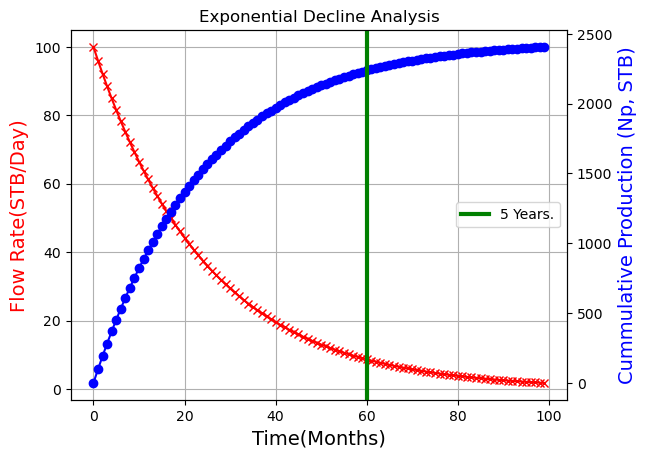

In [19]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(t,q, color="red", marker="x")
# set x-axis label
ax.set_xlabel("Time(Months)",fontsize=14)
# set y-axis label
ax.set_ylabel("Flow Rate(STB/Day)",color="red",fontsize=14)
ax.grid()



ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(t,Np_monthwise,color="blue",marker="o")
ax2.set_ylabel("Cummulative Production (Np, STB)",color="blue",fontsize=14)

ax2.axvline(60,color='green',lw=3,label='5 Years.')
ax2.legend(loc='center right')


plt.title('Exponential Decline Analysis')